In [1]:
import numpy
import scipy
import matplotlib.pyplot 
from mpl_toolkits.mplot3d import Axes3D


#Problem 1: Set up Github and clone assignment repo.

$\bullet \\ $   Go to http://www.github.com and create an account.

$\bullet$   Send your Github username to dg2991@columbia.edu.

$\bullet$   Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools.

$\bullet$   When I have received your email, you should get a confirmation that you have been added to the repo.

$\bullet$   Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259

$\bullet$   Follow the instructions to clone that repo to your local machine.

$\bullet$   You should type a command like:

git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git

**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)

The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

$ git add mynotebooksolutions.ipynb

$ git commit -m "added my homework"

$ git push origin master

#Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:

df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6


####What are the features?

$\bullet$ **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

$\bullet$ **Radio:** advertising dollars spent on Radio

$\bullet$ **Newspaper:** advertising dollars spent on Newspaper

####Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.

###Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

C:\Users\Saumya\Anaconda\lib\site-packages\pandas\tools\plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x187df7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x187fa588>,
 'fliers': [<matplotlib.lines.Line2D at 0x18805630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x188050b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x187df9e8>,
  <matplotlib.lines.Line2D at 0x186fab70>]}

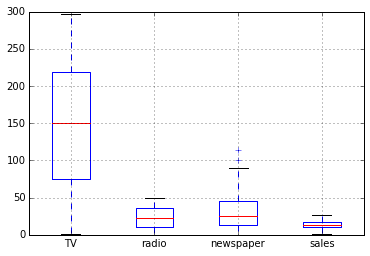

In [4]:
df.boxplot()

###Problem 2, Part 1: Create scatter plots using plt.scatter()

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply

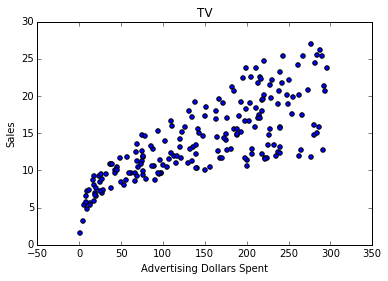

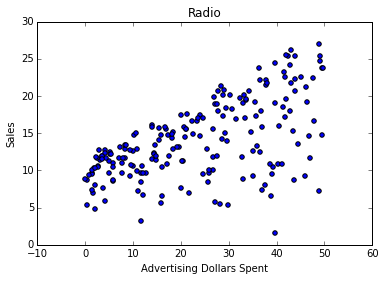

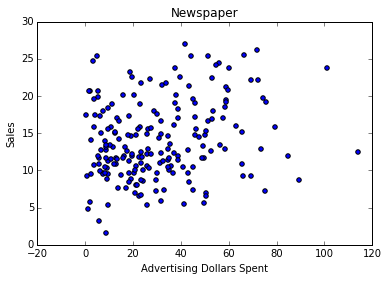

In [5]:
matplotlib.pyplot.scatter(df[['TV']],df[['sales']]) 
plt.title("TV")
plt.xlabel("Advertising Dollars Spent")
plt.ylabel("Sales")
plt.show()

matplotlib.pyplot.scatter(df[['radio']],df[['sales']]) 
plt.title("Radio")
plt.xlabel("Advertising Dollars Spent")
plt.ylabel("Sales")
plt.show()

matplotlib.pyplot.scatter(df[['newspaper']],df[['sales']]) 
plt.title("Newspaper")
plt.xlabel("Advertising Dollars Spent")
plt.ylabel("Sales")
plt.show()

[[ 1.          0.10886528 -0.03057725  0.04014873]
 [ 0.10886528  1.          0.06883854 -0.22558072]
 [-0.03057725  0.06883854  1.          0.0533215 ]
 [ 0.04014873 -0.22558072  0.0533215   1.        ]]


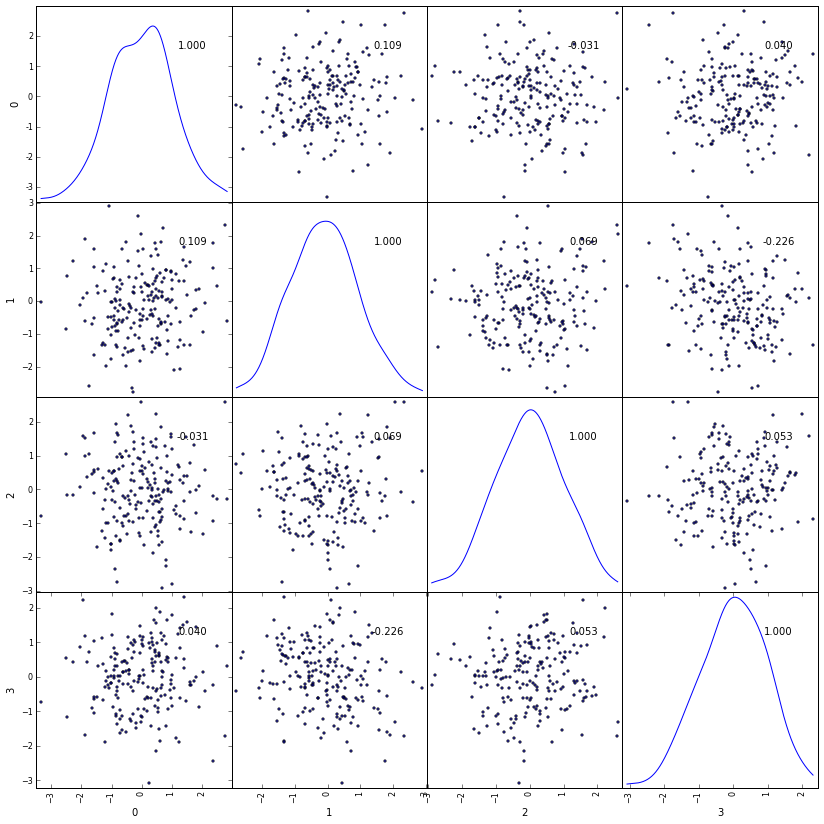

In [6]:
from pandas.tools.plotting import scatter_matrix

df1 = pd.DataFrame(numpy.random.randn(200, 4), df)
axes = pd.tools.plotting.scatter_matrix(df1, alpha=0.8, figsize=(14, 14), diagonal='kde')
corr = df1.corr().as_matrix()
print corr
for i in range (0,4):
    for j in range(0,4):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Each box represents how two variables are correlated.  A correlation number of 1 would mean a direct positive relationship between two variables.  Because of the low correlation numbers, it can be deduced that none of them are correlated to one another. There is a weak negative correlation between radio and sales.  Of course the variables are correlated to themselves which is why the diagonal is one's.


###Problem 2, Part 2: Predict sales using sklearn

$\bullet$ Split data into training and testing subsets.

$\bullet$ Train model using LinearRegression() from sklearn.linear_model on training data.

$\bullet$ Evaluate using RMSE and R^2 on testing set

If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance.

In [7]:
from sklearn.linear_model import LinearRegression


a) Set y to be the sales in df

In [8]:
y = df[['sales']]


b) Set X to be just the features described above in df

In [9]:
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [10]:
# Split the data into training/testing sets
size=200

print X.shape
f=numpy.random.permutation(size)
X = numpy.asarray(X)
f1 = X[f]
X_train = f1[0:int(size*0.8)]
X_test = f1[int(size*0.2):]


# Split the targets into training/testing sets
y = numpy.asarray(y)
print y.shape
f2 = y[f]
y_train = f2[0:int(size*0.8)]
y_test = f2[int(size*0.2):]

(200, 3)
(200L, 1L)


d) Train model on training data, and make predictions on testing data

In [11]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % numpy.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([[ 0.04610693,  0.18814334, -0.00050174]]))
Residual sum of squares: 3.03
Variance score: 0.88



e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(y_test, regr.predict(X_test))
print r2

0.882869284413


The R^2 = 
0.899624874891 is good because its low

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

Yes this looks like a good model because the residual sum of squares is low and the model fits the scatter plot well.

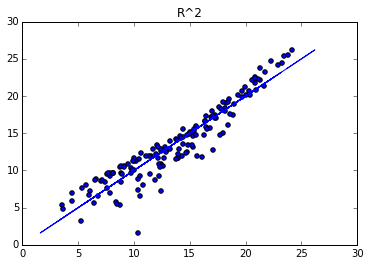

In [13]:

#plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)


g) Can you measure the importance of features in this model? What is something you should check before making conclusions? Try looking at LinearRegression().coef_

Yes you can see the importance of the features by looking at the coefficients.  If you look at R^2 first, you can check to see if you need to change the number of features.

In [14]:
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[ 0.04610693,  0.18814334, -0.00050174]]))



h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

The coefficients say that the newspaper advertising has the least affect on sales and radio advertising has the largest influence on sales.  You can also range between L1 and L2 norm in order to see how the error changes and for feature selection.


#How could you have improved performance?

Hint: Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer a new variable which will help, or try a nonlinear/non-parametric model

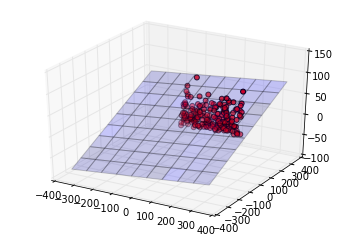

In [15]:
fig = plt.figure()
x = numpy.linspace(-350, 350, 10)
y = numpy.linspace(-350, 350, 10)
XX,YY = numpy.meshgrid(x,y)
Z = regr.coef_[0,0]*XX + YY*regr.coef_[0,1] + regr.coef_[0,2]
plt.title('R^2')
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, alpha=0.2)
#ax.scatter(X[0,:], X[1,:], X[2,:], c='r', s=50)
ax.scatter(df[['TV']],df[['radio']],df[['newspaper']],c='r', s=25)
#plt.scatter(df['TV','radio','newspaper'])
#plt.plot(y_test,y_test)

#Problem 3: Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all. Can you explain in words or math why this is?

As the learning rate increases, the error increases.  This means the difference between the computed and true solution is getting higher which means you are getting further away from the true solution so convergence does not occur.

In [16]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,lr):
    points = genfromtxt("data/data.csv", delimiter=",")
    learning_rate = lr*0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    error = compute_error_for_line_given_points(b, m, points)
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    return [error]


Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0470759787795, m = 1.47856684137, error = 112.639852759
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0458766848862, m = 1.47859041313, error = 112.640572174
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0410777165877, m = 1.47868473539, error = 112.643451996
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0270375926181, m = 1.36033694977, error = 147.70227463
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0185134178551, m = 0.935816224884, error = 847.952278949
Starting gradient descent at b = 0, m = 0, err

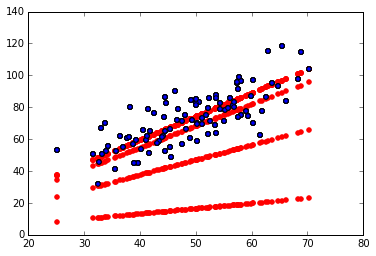

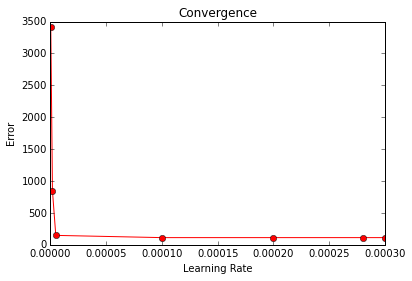

[  3.00000000e-04   2.80000000e-04   2.00000000e-04   1.00000000e-04
   5.00000000e-06   2.00000000e-06   5.00000000e-07]
[  112.63985276   112.64057217   112.643452     112.64705664   147.70227463
   847.95227895  3423.01967562]


In [17]:
# Use this to visually discuss convergence rate based on learning rate
lr = [3.0, 2.8, 2.0, 1.0, .05, .02, .005]
n=7
error_store=numpy.zeros(n)
learn_store=numpy.zeros(n)
for num in range(0,n):
    error=run(100,lr[num])
    error_store[num]=error[0]
    learn_store[num]=float(lr[num]*0.0001)
fig = plt.figure()
plt.plot(learn_store, error_store,'ro-')
plt.title("Convergence")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.show()

print learn_store
print error_store

##Problem 3 Part 2
Plot the error as a function of the number of iterations for various learning rates. Choose the rates so that it tells a story.

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = 0.0380769552439, m = 1.47874371444, error = 112.645253612
[112.64525361185571]
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0470759787795, m = 1.47856684137, error = 112.639852759
[112.63985275851445]
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 500 iterations b = 0.11870255616, m = 1.47715904282, error = 112.59708338
[112.59708337965159]
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1000 iterations b = 0.207328275636, m = 1.4754171313, error = 112.54469973
[112.54469973045394]
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = 0.037476651664, m = 1.47875551322, error = 112.645614108
[112.64561410756434]
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.04587

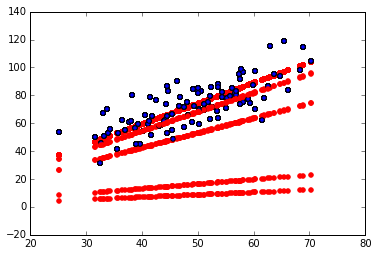

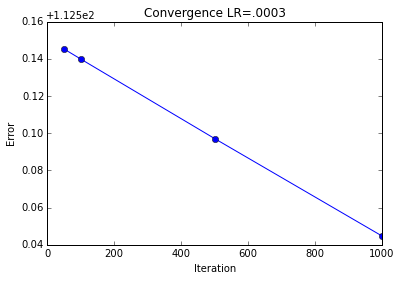

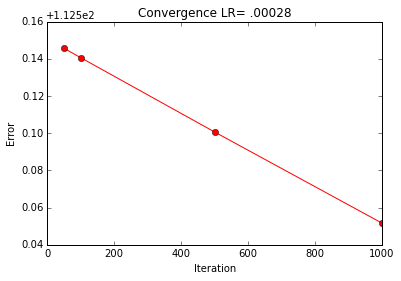

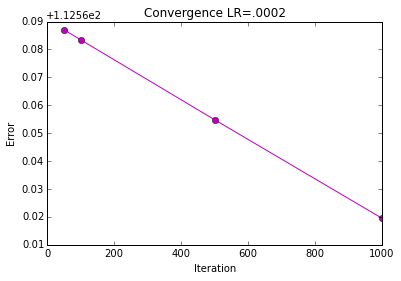

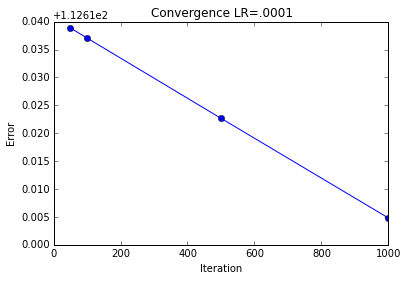

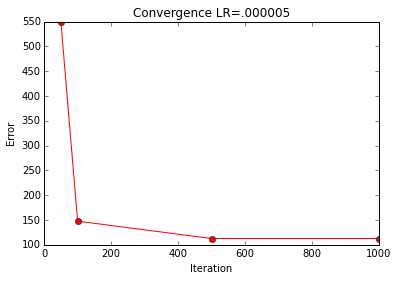

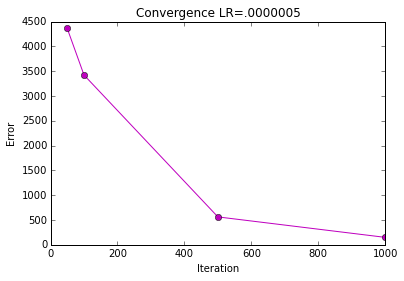

In [19]:
lr = [3.0, 2.8, 2.0, 1.0, .05, .005]
itera = [50,100,500,1000]
n=4
error_store=numpy.zeros((24,3))
k=0
for num in range(0,6):
    for inum in range(0,n):
        error=run(itera[inum],lr[num])
        learn=float(lr[num]*0.0001)
        print error
        error_store[k,0]=learn
        error_store[k,1]=itera[inum]
        error_store[k,2]=error[0]
        k = k + 1
fig = plt.figure()
plt.plot(error_store[0:4,1], error_store[0:4,2],'bo-')
plt.title("Convergence LR=.0003")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

fig = plt.figure()
plt.plot(error_store[4:8,1], error_store[4:8,2],'ro-')
plt.title("Convergence LR= .00028")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

fig = plt.figure()
plt.plot(error_store[8:12,1], error_store[8:12,2],'mo-')
plt.title("Convergence LR=.0002")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

fig = plt.figure()
plt.plot(error_store[12:16,1], error_store[12:16,2],'bo-')
plt.title("Convergence LR=.0001")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

fig = plt.figure()
plt.plot(error_store[16:20,1], error_store[16:20,2],'ro-')
plt.title("Convergence LR=.000005")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

fig = plt.figure()
plt.plot(error_store[20:24,1], error_store[20:24,2],'mo-')
plt.title("Convergence LR=.0000005")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()
